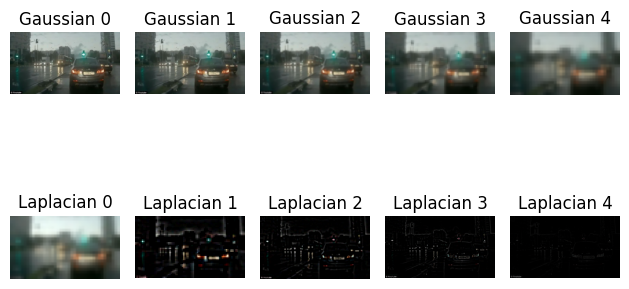

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('car_plate.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB for display

# Create Gaussian Pyramid (downsampling)
lower = image.copy()
gaussian_pyramid = [lower]

for i in range(4):  # Create 4 levels
    lower = cv2.pyrDown(lower)  # Reduce size by half
    gaussian_pyramid.append(lower)

# Create Laplacian Pyramid (upsampling)
laplacian_pyramid = [gaussian_pyramid[-1]]  # Start from the smallest image

for i in range(4, 0, -1):
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])  # Original size of the upper level
    expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)  # Upsample to previous size
    laplacian = cv2.subtract(gaussian_pyramid[i - 1], expanded)  # Get the difference (details)
    laplacian_pyramid.append(laplacian)

# Display results
for i, img in enumerate(gaussian_pyramid):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f'Gaussian {i}')
    plt.axis('off')

for i, img in enumerate(laplacian_pyramid):
    # Normalize to 0-255 for visibility
    lap_display = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    lap_display = cv2.convertScaleAbs(lap_display)
    
    plt.subplot(2, 5, i + 6)
    plt.imshow(lap_display)
    plt.title(f'Laplacian {i}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()
